In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from __future__ import annotations
import numpy as np
import scipy

from mflex.simulate.simulate_boundary import dalmatian

from mhsflex.field2d import Field2dData
from mhsflex.vis import plot, show_poles, show_footpoints
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt
from scipy.io import readsav

from mhsflex.field2d import check_fluxbalance, alpha_HS04
import mhsflex.fluxbalance
from mhsflex.metrics import pearson_corr_coeff_issi_2

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Avrett and Loeser (2008) C7 Model

In [4]:
h = np.array(
    [
        6.80844e04,
        4.70093e04,
        3.60795e04,
        2.66766e04,
        2.11331e04,
        1.53920e04,
        1.15962e04,
        8.97424e03,
        7.36082e03,
        5.76283e03,
        4.96864e03,
        4.29586e03,
        3.75271e03,
        3.42499e03,
        3.13379e03,
        2.97076e03,
        2.84440e03,
        2.76149e03,
        2.68810e03,
        2.62832e03,
        2.57823e03,
        2.53547e03,
        2.49556e03,
        2.45790e03,
        2.41866e03,
        2.37819e03,
        2.34610e03,
        2.32578e03,
        2.30855e03,
        2.29437e03,
        2.28238e03,
        2.26969e03,
        2.25943e03,
        2.25164e03,
        2.24332e03,
        2.23529e03,
        2.22774e03,
        2.22004e03,
        2.21374e03,
        2.20766e03,
        2.20192e03,
        2.19652e03,
        2.19146e03,
        2.18608e03,
        2.18244e03,
        2.17874e03,
        2.17528e03,
        2.17232e03,
        2.16999e03,
        2.16769e03,
        2.16603e03,
        2.16456e03,
        2.16329e03,
        2.16229e03,
        2.16126e03,
        2.16063e03,
        2.16001e03,
        2.15942e03,
        2.15884e03,
        2.15821e03,
        2.15757e03,
        2.15682e03,
        2.15616e03,
        2.15550e03,
        2.15473e03,
        2.15407e03,
        2.15348e03,
        2.15287e03,
        2.15203e03,
        2.15116e03,
        2.15012e03,
        2.14865e03,
        2.14705e03,
        2.14516e03,
        2.14193e03,
        2.13800e03,
        2.13600e03,
        2.13400e03,
        2.13200e03,
        2.13000e03,
        2.12600e03,
        2.12000e03,
        2.11000e03,
        2.09800e03,
        2.08300e03,
        2.05500e03,
        2.02400e03,
        1.98900e03,
        1.94600e03,
        1.89400e03,
        1.82000e03,
        1.72200e03,
        1.61700e03,
        1.52000e03,
        1.39800e03,
        1.29900e03,
        1.21400e03,
        1.14300e03,
        1.10100e03,
        1.06500e03,
        1.03200e03,
        1.00300e03,
        9.71000e02,
        9.46000e02,
        9.00000e02,
        8.54000e02,
        8.00000e02,
        7.50000e02,
        7.00000e02,
        6.60000e02,
        6.15000e02,
        5.60000e02,
        5.25000e02,
        4.90000e02,
        4.50000e02,
        4.00000e02,
        3.50000e02,
        3.00000e02,
        2.50000e02,
        2.00000e02,
        1.75000e02,
        1.50000e02,
        1.25000e02,
        1.00000e02,
        7.50000e01,
        5.00000e01,
        3.50000e01,
        2.00000e01,
        1.00000e01,
        0.00000e00,
        -1.00000e01,
        -2.00000e01,
        -3.00000e01,
        -4.00000e01,
        -5.00000e01,
        -6.00000e01,
        -7.00000e01,
        -8.00000e01,
        -9.00000e01,
        -1.00000e02,
    ]
)

In [5]:
T = np.array([
1.586E+06 ,
1.410E+06 ,
1.294E+06 ,
1.170E+06 ,
1.080E+06,
9.637E+05,
8.650E+05,
7.783E+05 ,
7.117E+05 ,
6.293E+05 ,
5.774E+05 ,
5.243E+05 ,
4.716E+05 ,
4.329E+05,
3.920E+05,
3.650E+05,
3.413E+05 ,
3.240E+05,
3.073E+05 ,
2.925E+05 ,
2.790E+05 ,
2.667E+05 ,
2.544E+05 ,
2.419E+05 ,
2.278E+05 ,
2.120E+05 ,
1.981E+05 ,
1.886E+05,
1.801E+05 ,
1.726E+05 ,
1.660E+05 ,
1.586E+05 ,
1.523E+05 ,
1.472E+05 ,
1.416E+05 ,
1.358E+05,
1.302E+05,
1.240E+05,
1.187E+05 ,
1.132E+05 ,
1.078E+05 ,
1.023E+05 ,
9.686E+04,
9.064E+04,
8.612E+04 ,
8.122E+04 ,
7.633E+04 ,
7.181E+04 ,
6.800E+04 ,
6.395E+04 ,
6.079E+04 ,
5.779E+04 ,
5.502E+04 ,
5.269E+04 ,
5.014E+04 ,
4.849E+04,
4.680E+04,
4.514E+04 ,
4.340E+04,
4.145E+04 ,
3.940E+04,
3.687E+04,
3.458E+04,
3.226E+04,
2.950E+04,
2.713E+04,
2.512E+04,
2.310E+04,
2.051E+04,
1.814E+04,
1.576E+04,
1.320E+04,
1.098E+04,
9.115E+03,
7.950E+03,
7.248E+03,
6.992E+03,
6.870E+03,
6.800E+03,
6.768E+03,
6.740E+03,
6.718E+03,
6.706E+03,
6.700E+03,
6.694E+03,
6.686E+03,
6.680E+03,
6.674E+03,
6.667E+03,
6.660E+03,
6.652E+03,
6.643E+03,
6.633E+03,
6.623E+03,
6.610E+03,
6.598E+03,
6.576E+03,
6.531E+03,
6.474E+03,
6.400E+03,
6.315E+03,
6.225E+03,
6.100E+03,
5.969E+03,
5.720E+03,
5.430E+03,
5.090E+03,
4.840E+03,
4.640E+03,
4.510E+03,
4.435E+03,
4.400E+03,
4.410E+03,
4.435E+03,
4.485E+03,
4.590E+03,
4.700E+03,
4.805E+03,
4.907E+03,
5.010E+03,
5.080E+03,
5.165E+03,
5.288E+03,
5.431E+03,
5.607E+03,
5.826E+03,
6.006E+03,
6.231E+03,
6.397E+03,
6.583E+03,
6.780E+03,
7.020E+03,
7.280E+03,
7.590E+03,
7.900E+03,
8.220E+03,
8.540E+03,
8.850E+03,
9.120E+03,
9.380E+03 ])


In [6]:
pg = np.array([
3.142E-02 ,
4.131E-02 ,
4.827E-02 ,
5.583E-02 ,
6.127E-02 ,
6.801E-02 ,
7.333E-02 ,
7.756E-02 ,
8.044E-02 ,
8.355E-02 ,
8.516E-02 ,
8.653E-02 ,
8.757E-02 ,
8.810E-02 ,
8.842E-02,
8.847E-02 ,
8.840E-02 ,
8.827E-02 ,
8.808E-02 ,
8.785E-02 ,
8.758E-02 ,
8.748E-02 ,
8.744E-02 ,
8.737E-02 ,
8.726E-02 ,
8.710E-02 ,
8.692E-02,
8.677E-02,
8.662E-02 ,
8.647E-02 ,
8.633E-02 ,
8.615E-02 ,
8.599E-02,
8.586E-02,
8.569E-02,
8.552E-02,
8.531E-02,
8.506E-02,
8.483E-02,
8.457E-02 ,
8.430E-02 ,
8.401E-02 ,
8.370E-02 ,
8.332E-02 ,
8.303E-02 ,
8.269E-02 ,
8.234E-02 ,
8.200E-02 ,
8.170E-02 ,
8.137E-02 ,
8.112E-02 ,
8.088E-02,
8.065E-02,
8.046E-02,
8.025E-02,
8.012E-02 ,
7.999E-02 ,
7.986E-02 ,
7.974E-02 ,
7.960E-02 ,
7.948E-02 ,
7.935E-02 ,
7.931E-02 ,
7.927E-02 ,
7.922E-02, 
7.916E-02,
7.907E-02,
7.891E-02,
7.869E-02,
7.844E-02,
7.811E-02,
7.756E-02,
7.565E-02,
7.338E-02,
7.239E-02,
7.238E-02,
7.253E-02,
7.288E-02,
7.331E-02,
7.381E-02,
7.486E-02,
7.649E-02,
7.932E-02,
8.289E-02,
8.761E-02,
9.719E-02,
1.091E-01,
1.247E-01,
1.475E-01,
1.817E-01,
2.480E-01,
3.832E-01,
6.368E-01,
1.061E+00,
2.151E+00,
3.923E+00,
6.640E+00,
1.038E+01,
1.356E+01,
1.712E+01,
2.126E+01,
2.580E+01,
3.206E+01,
3.813E+01,
5.306E+01,
7.504E+01,
1.156E+02,
1.768E+02,
2.759E+02,
3.990E+02,
6.102E+02,
1.032E+03,
1.444E+03,
2.017E+03,
2.945E+03,
4.690E+03,
7.387E+03,
1.151E+04,
1.774E+04,
2.702E+04,
3.319E+04,
4.060E+04,
4.942E+04,
5.979E+04,
7.186E+04,
8.570E+04,
9.489E+04,
1.047E+05,
1.116E+05,
1.188E+05,
1.261E+05,
1.336E+05,
1.411E+05,
1.489E+05,
1.570E+05,
1.654E+05,
1.738E+05,
1.823E+05,
1.909E+05,
1.995E+05])


In [7]:
ptot = np.array([
3.227E02 ,
4.256E02 ,
4.986E02 ,
5.787E02 ,
6.369E02 ,
7.102E02 ,
7.694E02,
8.180E02,
8.526E02,
8.920E02,
9.145E02 ,
9.356E02,
9.548E02,
9.677E02,
9.803E02,
9.879E02,
9.943E02,
9.988E02,
1.003E01 ,
1.006E01 ,
1.010E01 ,
1.012E01 ,
1.015E01 ,
1.018E01 ,
1.021E01 ,
1.024E01,
1.027E01,
1.029E01,
1.030E01 ,
1.032E01 ,
1.033E01 ,
1.034E01 ,
1.035E01,
1.036E01,
1.037E01,
1.038E01,
1.039E01,
1.040E01,
1.041E01 ,
1.042E01 ,
1.043E01 ,
1.044E01 ,
1.045E01 ,
1.046E01 ,
1.046E01 ,
1.047E01 ,
1.048E01 ,
1.048E01 ,
1.049E01 ,
1.050E01 ,
1.050E01 ,
1.050E01,
1.051E01 ,
1.051E01 ,
1.051E01 ,
1.052E01 ,
1.052E01 ,
1.052E01 ,
1.052E01 ,
1.053E01 ,
1.053E01 ,
1.053E01 ,
1.053E01 ,
1.054E01 ,
1.054E01, 
1.055E01,
1.055E01,
1.055E01,
1.056E01,
1.057E01,
1.058E01,
1.060E01,
1.062E01,
1.065E01,
1.073E01,
1.083E01,
1.088E01,
1.094E01,
1.100E01,
1.106E01,
1.117E01,
1.136E01,
1.167E01,
1.206E01,
1.257E01,
1.360E01,
1.488E01,
1.653E01,
1.893E01,
2.253E01,
2.942E01,
4.353E01,
6.975E01,
1.133E+00,
2.228E+00,
4.009E+00,
6.742E+00,
1.049E+01,
1.369E+01,
1.726E+01,
2.141E+01,
2.596E+01,
3.225E+01,
3.835E+01,
5.335E+01,
7.543E+01,
1.162E+02,
1.775E+02,
2.769E+02,
4.004E+02,
6.120E+02,
1.035E+03,
1.447E+03,
2.021E+03,
2.951E+03,
4.699E+03,
7.401E+03,
1.154E+04,
1.781E+04,
2.721E+04,
3.350E+04,
4.109E+04,
5.017E+04,
6.092E+04,
7.350E+04,
8.804E+04,
9.772E+04,
1.081E+05,
1.153E+05,
1.228E+05,
1.305E+05,
1.385E+05,
1.466E+05,
1.548E+05,
1.631E+05,
1.715E+05,
1.800E+05,
1.886E+05,
1.972E+05,
2.059E+05])


In [8]:
nH = np.array([
6.233E+07 ,
9.217E+07 ,
1.174E+08 ,
1.502E+08 ,
1.786E+08 ,
2.221E+08 ,
2.667E+08,
3.135E+08,
3.556E+08,
4.177E+08 ,
4.641E+08 ,
5.193E+08,
5.842E+08,
6.403E+08,
7.096E+08 ,
7.625E+08 ,
8.149E+08 ,
8.571E+08 ,
9.018E+08 ,
9.451E+08 ,
9.876E+08 ,
1.032E+09 ,
1.082E+09 ,
1.137E+09 ,
1.205E+09,
1.293E+09,
1.380E+09,
1.447E+09,
1.513E+09 ,
1.576E+09 ,
1.637E+09 ,
1.710E+09 ,
1.778E+09 ,
1.836E+09 ,
1.905E+09 ,
1.982E+09 ,
2.064E+09 ,
2.160E+09 ,
2.251E+09 ,
2.353E+09 ,
2.465E+09 ,
2.589E+09 ,
2.727E+09 ,
2.904E+09,
3.049E+09,
3.225E+09,
3.422E+09,
3.628E+09,
3.822E+09,
4.054E+09,
4.255E+09,
4.468E+09,
4.684E+09 ,
4.885E+09 ,
5.127E+09 ,
5.297E+09 ,
5.484E+09 ,
5.683E+09 ,
5.908E+09 ,
6.185E+09 ,
6.508E+09,
6.958E+09,
7.433E+09,
7.985E+09,
8.757E+09,
9.547E+09,
1.033E+10,
1.125E+10,
1.269E+10,
1.437E+10,
1.663E+10,
2.009E+10,
2.469E+10,
3.187E+10,
3.784E+10,
4.204E+10,
4.388E+10,
4.493E+10,
4.565E+10,
4.612E+10,
4.685E+10,
4.783E+10,
4.944E+10,
5.153E+10,
5.438E+10,
6.042E+10,
6.843E+10,
7.917E+10,
9.543E+10,
1.210E+11,
1.730E+11,
2.864E+11,
5.170E+11,
9.256E+11,
2.012E+12,
3.780E+12,
6.488E+12,
1.028E+13,
1.360E+13,
1.742E+13,
2.198E+13,
2.711E+13,
3.445E+13,
4.193E+13,
6.097E+13,
9.092E+13,
1.495E+14,
2.405E+14,
3.914E+14,
5.825E+14,
9.059E+14,
1.545E+15,
2.156E+15,
2.994E+15,
4.324E+15,
6.729E+15,
1.035E+16,
1.578E+16,
2.381E+16,
3.552E+16,
4.303E+16,
5.178E+16,
6.156E+16,
7.251E+16,
8.441E+16,
9.687E+16,
1.040E+17,
1.107E+17,
1.149E+17,
1.188E+17,
1.223E+17,
1.251E+17,
1.274E+17,
1.287E+17,
1.303E+17,
1.315E+17,
1.326E+17,
1.336E+17,
1.351E+17,
1.366E+17])


In [9]:
nH1 = np.array([
8.860E+00 ,
1.522E+01 ,
2.164E+01 ,
3.152E+01 ,
4.163E+01 ,
6.013E+01 ,
8.348E+01 ,
1.133E+02 ,
1.455E+02,
2.034E+02,
2.560E+02,
3.303E+02,
4.361E+02 ,
5.457E+02 ,
7.082E+02 ,
8.549E+02,
1.022E+03 ,
1.174E+03 ,
1.353E+03,
1.546E+03,
1.757E+03 ,
1.993E+03,
2.279E+03,
2.632E+03,
3.132E+03,
3.873E+03,
4.740E+03,
5.502E+03,
6.347E+03 ,
7.241E+03 ,
8.195E+03 ,
9.482E+03 ,
1.082E+04 ,
1.209E+04 ,
1.377E+04 ,
1.582E+04 ,
1.831E+04 ,
2.165E+04,
2.531E+04,
2.996E+04,
3.595E+04,
4.375E+04,
5.404E+04,
7.053E+04,
8.766E+04,
1.141E+05 ,
1.611E+05 ,
2.501E+05,
4.054E+05,
7.644E+05,
1.319E+06 ,
2.253E+06,
3.680E+06 ,
5.494E+06 ,
8.397E+06 ,
1.095E+07 ,
1.428E+07 ,
1.832E+07 ,
2.352E+07 ,
3.092E+07 ,
4.068E+07,
5.605E+07,
7.423E+07,
9.798E+07,
1.349E+08,
1.763E+08,
2.210E+08,
2.769E+08,
3.809E+08,
5.412E+08,
8.787E+08,
1.749E+09,
4.413E+09,
1.165E+10,
1.693E+10,
1.954E+10,
2.066E+10,
2.118E+10,
2.147E+10,
2.157E+10,
2.167E+10,
2.176E+10,
2.204E+10,
2.258E+10,
2.351E+10,
2.583E+10,
2.916E+10,
3.447E+10,
4.371E+10,
6.005E+10,
9.843E+10,
1.916E+11,
4.012E+11,
7.956E+11,
1.880E+12,
3.641E+12,
6.322E+12,
1.009E+13,
1.340E+13,
1.722E+13,
2.179E+13,
2.693E+13,
3.428E+13,
4.178E+13,
6.086E+13,
9.085E+13,
1.495E+14,
2.404E+14,
3.914E+14,
5.825E+14,
9.058E+14,
1.545E+15,
2.155E+15,
2.993E+15,
4.322E+15,
6.726E+15,
1.034E+16,
1.577E+16,
2.379E+16,
3.549E+16,
4.299E+16,
5.173E+16,
6.150E+16,
7.244E+16,
8.434E+16,
9.680E+16,
1.040E+17,
1.106E+17,
1.148E+17,
1.187E+17,
1.222E+17,
1.249E+17,
1.271E+17,
1.283E+17,
1.296E+17,
1.305E+17,
1.311E+17,
1.315E+17,
1.322E+17,
1.328E+17])


In [10]:
ne = np.array([
7.491E+07,
1.108E+08,
1.411E+08,
1.805E+08,
2.147E+08,
2.669E+08,
3.206E+08,
3.768E+08,
4.274E+08,
5.021E+08,
5.578E+08,
6.242E+08,
7.022E+08,
7.695E+08,
8.529E+08,
9.165E+08,
9.794E+08,
1.030E+09,
1.084E+09,
1.136E+09,
1.187E+09,
1.240E+09,
1.300E+09,
1.366E+09,
1.448E+09,
1.554E+09,
1.659E+09,
1.739E+09,
1.819E+09,
1.894E+09,
1.966E+09,
2.054E+09,
2.135E+09,
2.205E+09,
2.288E+09,
2.379E+09,
2.477E+09,
2.592E+09,
2.700E+09,
2.821E+09,
2.953E+09,
3.099E+09,
3.259E+09,
3.463E+09,
3.628E+09,
3.827E+09,
4.049E+09,
4.280E+09,
4.497E+09,
4.757E+09,
4.984E+09,
5.222E+09,
5.464E+09,
5.687E+09,
5.955E+09,
6.142E+09,
6.348E+09,
6.565E+09,
6.809E+09,
7.107E+09,
7.454E+09,
7.933E+09,
8.434E+09,
9.013E+09,
9.815E+09,
1.063E+10,
1.144E+10,
1.237E+10,
1.383E+10,
1.550E+10,
1.761E+10,
2.046E+10,
2.274E+10,
2.325E+10,
2.432E+10,
2.608E+10,
2.686E+10,
2.741E+10,
2.787E+10,
2.826E+10,
2.891E+10,
2.985E+10,
3.128E+10,
3.293E+10,
3.498E+10,
3.883E+10,
4.307E+10,
4.826E+10,
5.526E+10,
6.450E+10,
7.969E+10,
1.027E+11,
1.267E+11,
1.423E+11,
1.438E+11,
1.489E+11,
1.760E+11,
1.995E+11,
2.104E+11,
2.091E+11,
2.021E+11,
1.903E+11,
1.727E+11,
1.513E+11,
1.162E+11,
8.055E+10,
5.458E+10,
4.762E+10,
5.159E+10,
6.424E+10,
9.163E+10,
1.467E+11,
1.996E+11,
2.718E+11,
3.871E+11,
6.034E+11,
9.337E+11,
1.433E+12,
2.182E+12,
3.308E+12,
4.102E+12,
5.132E+12,
6.596E+12,
8.748E+12,
1.233E+13,
1.909E+13,
2.729E+13,
4.258E+13,
5.893E+13,
8.397E+13,
1.206E+14,
1.828E+14,
2.794E+14,
4.465E+14,
6.910E+14,
1.050E+15,
1.547E+15,
2.196E+15,
2.929E+15,
3.808E+15])


In [11]:
m = np.array([ 1.178E-06 ,
1.553E-06 ,
1.820E-06 ,
2.112E-06 ,
2.325E-06 ,
2.592E-06 ,
2.808E-06 ,
2.986E-06 ,
3.112E-06 ,
3.256E-06,
3.338E-06 ,
3.415E-06 ,
3.485E-06 ,
3.532E-06 ,
3.578E-06 ,
3.606E-06 ,
3.629E-06 ,
3.645E-06,
3.661E-06 ,
3.674E-06 ,
3.685E-06 ,
3.695E-06 ,
3.705E-06 ,
3.715E-06 ,
3.725E-06 ,
3.737E-06 ,
3.747E-06 ,
3.754E-06 ,
3.760E-06 ,
3.765E-06 ,
3.770E-06 ,
3.775E-06 ,
3.779E-06 ,
3.782E-06 ,
3.786E-06 ,
3.789E-06 ,
3.793E-06 ,
3.797E-06 ,
3.800E-06 ,
3.803E-06 ,
3.806E-06 ,
3.810E-06 ,
3.813E-06 ,
3.816E-06 ,
3.819E-06 ,
3.822E-06 ,
3.824E-06 ,
3.827E-06 ,
3.829E-06 ,
3.831E-06 ,
3.833E-06 ,
3.834E-06 ,
3.835E-06 ,
3.837E-06 ,
3.838E-06 ,
3.838E-06 ,
3.839E-06 ,
3.840E-06 ,
3.841E-06 ,
3.842E-06 ,
3.843E-06 ,
3.844E-06 ,
3.845E-06 ,
3.846E-06 ,
3.848E-06 ,
3.849E-06,
3.850E-06,
3.852E-06,
3.854E-06,
3.857E-06,
3.861E-06,
3.867E-06,
3.876E-06,
3.888E-06,
3.915E-06,
3.951E-06,
3.971E-06,
3.992E-06,
4.014E-06,
4.035E-06,
4.079E-06,
4.145E-06,
4.259E-06,
4.401E-06,
4.587E-06,
4.963E-06,
5.430E-06,
6.034E-06,
6.910E-06,
8.221E-06,
1.074E-05,
1.589E-05,
2.546E-05,
4.136E-05,
8.131E-05,
1.463E-04,
2.461E-04,
3.830E-04,
4.997E-04,
6.299E-04,
7.814E-04,
9.476E-04,
1.177E-03,
1.400E-03,
1.947E-03,
2.753E-03,
4.240E-03,
6.480E-03,
1.011E-02,
1.461E-02,
2.234E-02,
3.778E-02,
5.282E-02,
7.376E-02,
1.077E-01,
1.715E-01,
2.701E-01,
4.211E-01,
6.500E-01,
9.933E-01,
1.223E+00,
1.500E+00,
1.831E+00,
2.223E+00,
2.683E+00,
3.213E+00,
3.567E+00,
3.944E+00,
4.208E+00,
4.482E+00,
4.765E+00,
5.055E+00,
5.351E+00,
5.651E+00,
5.954E+00,
6.261E+00,
6.570E+00,
6.882E+00,
7.197E+00,
7.515E+00])


In [12]:
V = np.array([
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.400E+01 ,
3.372E+01 ,
3.332E+01 ,
3.289E+01 ,
3.238E+01 ,
3.177E+01 ,
3.121E+01 ,
3.080E+01 ,
3.041E+01 ,
3.006E+01 ,
2.973E+01 ,
2.936E+01 ,
2.902E+01 ,
2.874E+01 ,
2.842E+01 ,
2.808E+01 ,
2.774E+01 ,
2.738E+01 ,
2.704E+01 ,
2.669E+01 ,
2.631E+01 ,
2.591E+01 ,
2.549E+01 ,
2.498E+01 ,
2.459E+01 ,
2.414E+01 ,
2.366E+01 ,
2.319E+01 ,
2.277E+01 ,
2.229E+01 ,
2.189E+01 ,
2.149E+01 ,
2.110E+01 ,
2.075E+01 ,
2.036E+01 ,
2.009E+01 ,
1.980E+01 ,
1.951E+01 ,
1.919E+01 ,
1.882E+01 ,
1.840E+01 ,
1.785E+01 ,
1.729E+01 ,
1.670E+01 ,
1.598E+01 ,
1.533E+01,
1.478E+01,
1.422E+01,
1.346E+01,
1.272E+01,
1.192E+01,
1.098E+01,
1.027E+01,
9.422E+00,
8.868E+00,
8.535E+00,
8.401E+00,
8.328E+00,
8.279E+00,
8.247E+00,
8.199E+00,
8.134E+00,
8.033E+00,
7.901E+00,
7.729E+00,
7.403E+00,
7.031E+00,
6.617E+00,
6.118E+00,
5.542E+00,
4.776E+00,
3.939E+00,
3.165E+00,
2.576E+00,
1.804E+00,
1.390E+00,
1.159E+00,
9.900E-01,
8.959E-01,
8.235E-01,
7.647E-01,
7.193E-01,
6.885E-01,
6.722E-01,
6.411E-01,
6.079E-01,
5.634E-01,
5.201E-01,
4.738E-01,
4.390E-01,
4.064E-01,
3.755E-01,
3.609E-01,
3.501E-01,
3.420E-01,
3.381E-01,
3.412E-01,
3.667E-01,
4.919E-01,
6.882E-01,
7.918E-01,
9.003E-01,
1.023E+00,
1.153E+00,
1.286E+00,
1.434E+00,
1.522E+00,
1.601E+00,
1.651E+00,
1.696E+00,
1.763E+00,
1.835E+00,
1.912E+00,
1.986E+00,
2.000E+00,
2.000E+00,
2.000E+00,
2.000E+00,
2.000E+00,
2.000E+00])


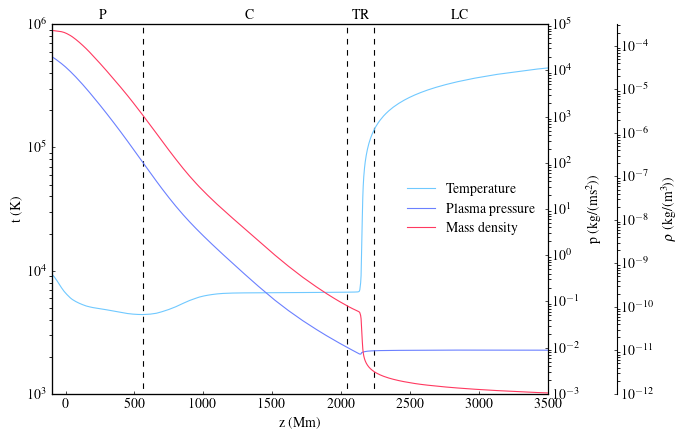

In [51]:
fig, ax1 = plt.subplots()


ax1.axvline(560, color=c3, linestyle=(5,(5,5)), linewidth=0.8)
ax1.axvline(2040, color=c3, linestyle=(5,(5,5)), linewidth=0.8)
ax1.axvline(2240, color=c3, linestyle=(5,(5,5)), linewidth=0.8)

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.plot(h, T, c=c1, linewidth=0.8, label="Temperature")
ax1.set_yscale("log")
# ax1.set_xscale("log")
ax1.set_ylim(10**3, 10**6)
ax1.set_xlim(-100, 3500)
ax1.set_ylabel("t (K)")

ax2.plot(h, pg*10**-1, c=c2, linewidth=0.8, label="Plasma pressure")
# ax2.plot(h, ptot*10**-1)
ax2.set_ylim(10**-3, 10**5)
ax2.set_yscale("log")
ax2.set_ylabel(r"p (kg/(ms$^2$))")

# ax3.plot(h, m*10)
ax3.plot(h, nH*10**6*  1.67262 * 10**-27, c=c4, linewidth=0.8, label="Mass density")
# ax3.plot(h, nH1*10**6*  1.67262 * 10**-27)
# ax3.plot(h, ne*10**6)
ax3.set_ylim(10**-12, 10**-3.5)
ax3.set_yscale("log")
ax3.set_ylabel(r"$\rho$ (kg/(m$^3$))")

ax1.set_xlabel("z (Mm)")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines = lines1 + lines2 + lines3 
labels = labels1 + labels2 + labels3 
plt.legend(lines, labels, frameon=False, loc="center right")

ax1.tick_params(direction="in", length=2, width=0.5)
ax2.tick_params(direction="in", length=2, width=0.5)
ax3.tick_params(direction="in", length=2, width=0.5)
ax3.spines["right"].set_position(("outward", 50))

ax1.text(240, 10**6 + 100000, "P")
ax1.text(1300, 10**6 + 100000, "C")
ax1.text(2080, 10**6 + 100000, "TR")
ax1.text(2800, 10**6 + 100000, "LC")
plotname = "/Users/lilli/Desktop/Thesis/Introduction/AvrettLoeser.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [19]:
h[T.argmin()]

560.0